In [3]:
# !pip install lenskit

In [85]:
import pandas as pd

from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser
from lenskit.algorithms.item_knn import ItemItem

In [54]:
data_folder = 'data/'

item_ratings_df = pd.read_csv(data_folder + 'user_ratings.csv')
item_info = pd.read_csv(data_folder + 'games.csv')
item_mecahnics = pd.read_csv(data_folder + 'mechanics.csv')
item_subcategories = pd.read_csv(data_folder + 'subcategories.csv')
item_themes = pd.read_csv(data_folder + 'themes.csv')

In [55]:
item_ratings_df

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP
...,...,...,...
18942210,165521,3.0,rseater
18942211,165521,3.0,Bluefox86
18942212,165521,3.0,serginator
18942213,193488,1.0,CaptainCattan


In [56]:
user_rating_count = item_ratings_df.groupby('Username').count()
user_rating_count

,BGGId,Rating
Username,,
Fu_Koios,2,2
beastvol,9,9
mycroft,14,14
woh,5,5
(mostly) harmless,1,1
...,...,...
zzzuzu,39,39
zzzvone,21,21
zzzxxxyyy,36,36


In [57]:
min_rating_count = 10
user_rating_count = user_rating_count[user_rating_count['Rating'] >= min_rating_count]

In [58]:
user_list_filtered = list(user_rating_count.index)

In [59]:
len(item_ratings_df['Username'].unique())

411375

In [60]:
len(user_list_filtered)

224604

In [62]:
item_ratings_df_filtered = item_ratings_df[item_ratings_df['Username'].isin(user_list_filtered)]

In [64]:
len(item_ratings_df_filtered['Username'].unique())

224604

In [65]:
item_ratings_df_filtered

,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP
...,...,...,...
18942210,165521,3.0,rseater
18942211,165521,3.0,Bluefox86
18942212,165521,3.0,serginator
18942213,193488,1.0,CaptainCattan


In [68]:
item_ratings_df_filtered.index = item_ratings_df_filtered['Username']
item_ratings_df_filtered.drop(columns = ['Username'], inplace = True)

E:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
item_ratings_df_filtered.head()

,BGGId,Rating
Username,,
Tonydorrf,213788,8.0
tachyon14k,213788,8.0
Ungotter,213788,8.0
brainlocki3,213788,8.0
PPMP,213788,8.0


In [75]:
item_ratings_df_filtered = item_ratings_df_filtered.rename(columns={'BGGId': 'item', 'Rating':'rating'})
item_ratings_df_filtered = item_ratings_df_filtered.rename_axis('user')

In [79]:
item_ratings_df_filtered['user'] = item_ratings_df_filtered.index

In [81]:
item_ratings_df_filtered = item_ratings_df_filtered.reset_index(drop=True)

In [82]:
item_ratings_df_filtered

,item,rating,user
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP
...,...,...,...
18372982,165521,3.0,rseater
18372983,165521,3.0,Bluefox86
18372984,165521,3.0,serginator
18372985,193488,1.0,CaptainCattan


### Build User CF

In [83]:
num_recs = 10  # Number of recommendations to generate
user_user = UserUser(15, min_nbrs=3)  # Minimum (3) and maximum (15) number of neighbors to consider
recsys = Recommender.adapt(user_user)
recsys.fit(item_ratings_df_filtered)

In [84]:
recsys.recommend('Ungotter', 10)

,item,score
0,323046,10.103747
1,210428,10.021144
2,17821,9.622031
3,151070,9.589717
4,16957,9.543816
5,16972,9.430761
6,291951,9.411637
7,167349,9.309768
8,345976,9.257857
9,15049,9.180250


### Build Item CF

In [86]:
num_recs = 10  # Number of recommendations to generate
item_item = ItemItem(15, min_nbrs=3)  # Minimum (3) and maximum (15) number of neighbors to consider
recsys_itemitem = Recommender.adapt(item_item)
recsys_itemitem.fit(item_ratings_df_filtered)

In [87]:
recsys_itemitem.recommend('Ungotter', 10)

,item,score
0,323046,10.234404
1,284121,9.996634
2,293925,9.991308
3,245823,9.686090
4,148007,9.650690
5,236974,9.606920
6,273769,9.570357
7,345976,9.427900
8,220975,9.416284
9,148213,9.416008


### Build CB

In [93]:
# item_ratings_df = pd.read_csv(data_folder + 'user_ratings.csv')
# item_info = pd.read_csv(data_folder + 'games.csv')
# item_mecahnics = pd.read_csv(data_folder + 'mechanics.csv')
# item_subcategories = pd.read_csv(data_folder + 'subcategories.csv')
# item_themes = pd.read_csv(data_folder + 'themes.csv')

item_info.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [100]:
item_info[['GoodPlayers', 'Family', 'ImagePath']]

,GoodPlayers,Family,ImagePath
0,"['4', '5']",Classic Line (Valley Games),https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...
1,[],NaN,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
2,"['2', '3', '4']",Euro Classics (Reiner Knizia),https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...
3,[],NaN,https://cf.geekdo-images.com/nYiYhUlatT2DpyXaJ...
4,"['3', '4', '5']",3M Bookshelf,https://cf.geekdo-images.com/3C--kJRhi6kTPHsr9...
...,...,...,...
21920,[],NaN,https://cf.geekdo-images.com/Uzx3n6dd0LGC2sGyS...
21921,[],NaN,https://cf.geekdo-images.com/eG4UBkwA9SNNEFUkE...
21922,[],NaN,https://cf.geekdo-images.com/TRCPgnDKCu8civrbB...
21923,[],NaN,https://cf.geekdo-images.com/6ILh7aNVHosY-m5gG...


In [97]:
item_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

<Axes: >

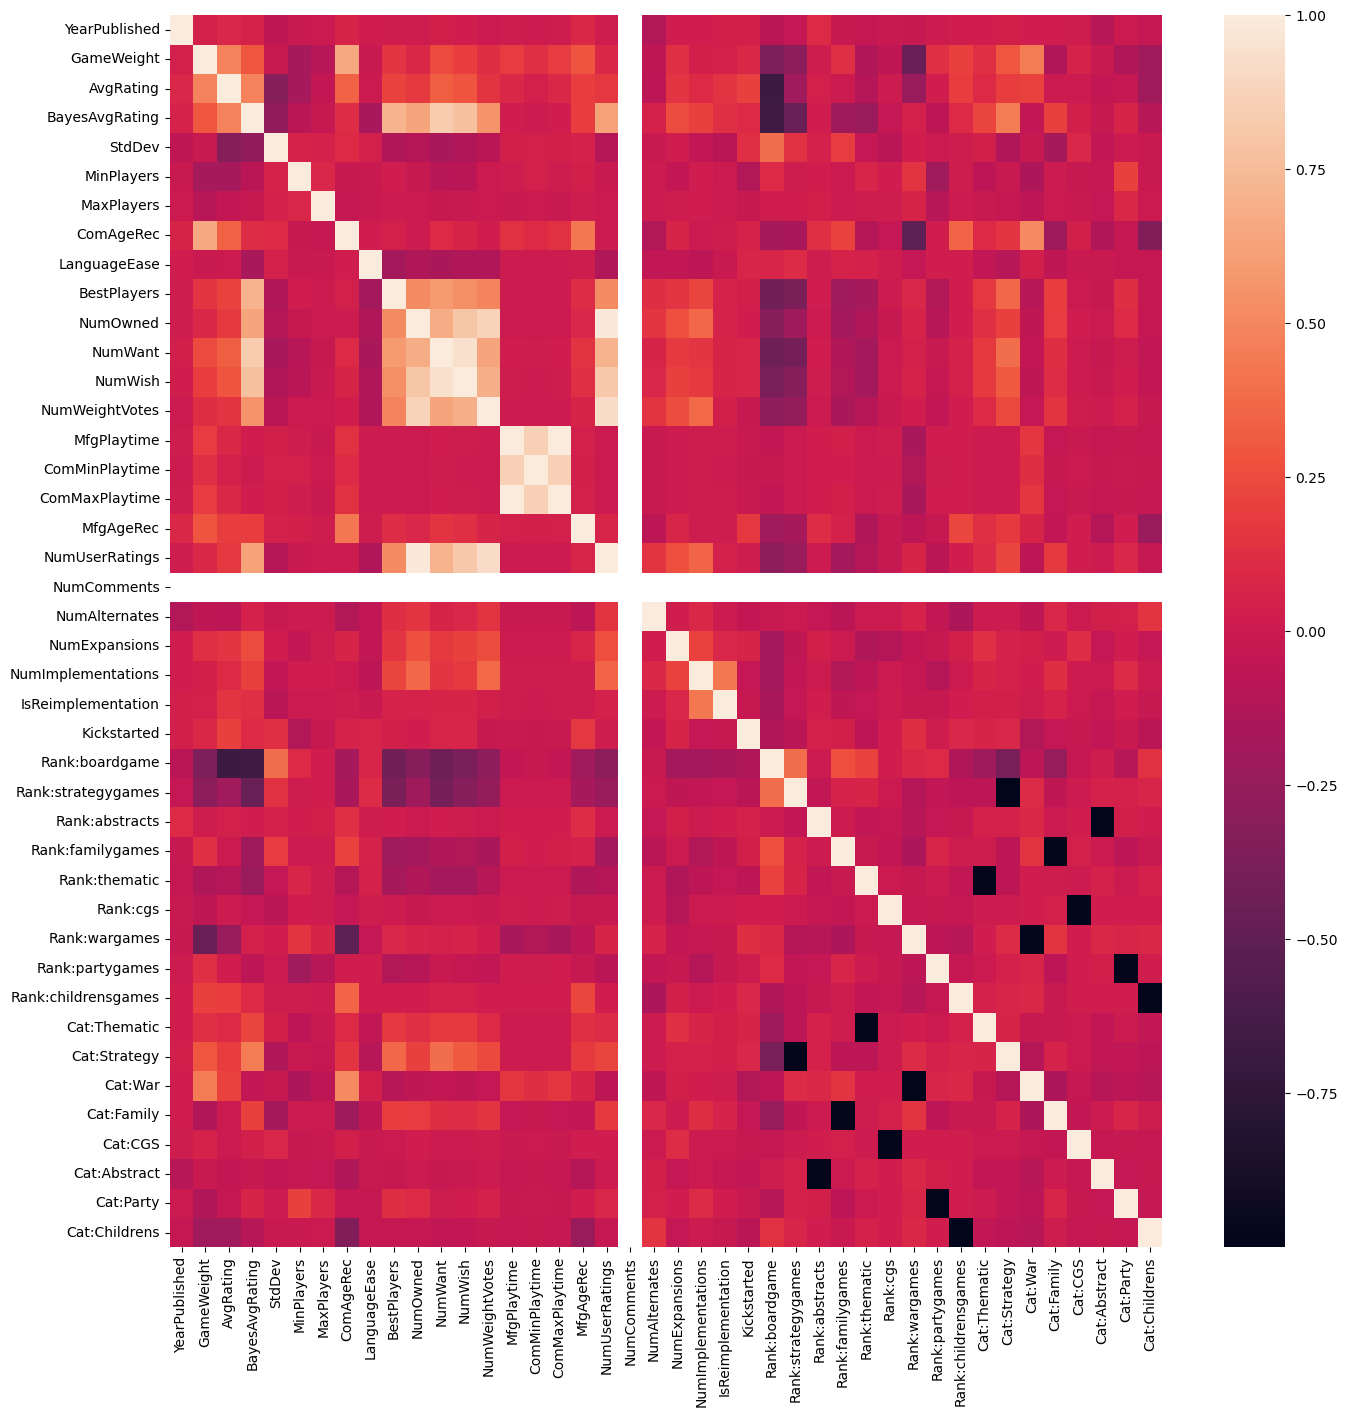

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

item_info_correlation = item_info.drop(columns= ['Name', 'Description', 'BGGId', 'GoodPlayers', 'Family', 'ImagePath'])

sns.heatmap(item_info_correlation.corr())